In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
df = pd.read_csv('../data/raw/imoveis_bh.csv')
df.head()

,ID,Area (m2),Quartos,Banheiros,Vagas de Garagem,Bairro,Andar,Preco (R$),Tipo de Imovel,Ano de Construcao,Observacoes
0,1,85,3.0,2,1,Savassi,5.0,750000,Apartamento,1995,Apartamento com otima localizacao.
1,2,120,4.0,3,2,Lourdes,10.0,1200000,Apartamento,2010,Vista panoramica.
2,3,250,5.0,4,3,Pampulha,NaN,2500000,Casa,2005,NaN
3,4,60,1.0,1,1,Centro,2.0,400000,Apartamento,2018,Proximo ao metro.
4,5,180,4.0,3,2,Anchieta,3.0,1500000,Apartamento,2008,NaN


In [13]:
print(df.columns)

Index(['ID', 'Area (m2)', 'Quartos', 'Banheiros', 'Vagas de Garagem', 'Bairro',
       'Andar', 'Preco (R$)', 'Tipo de Imovel', 'Ano de Construcao',
       'Observacoes'],
      dtype='object')


<Axes: >

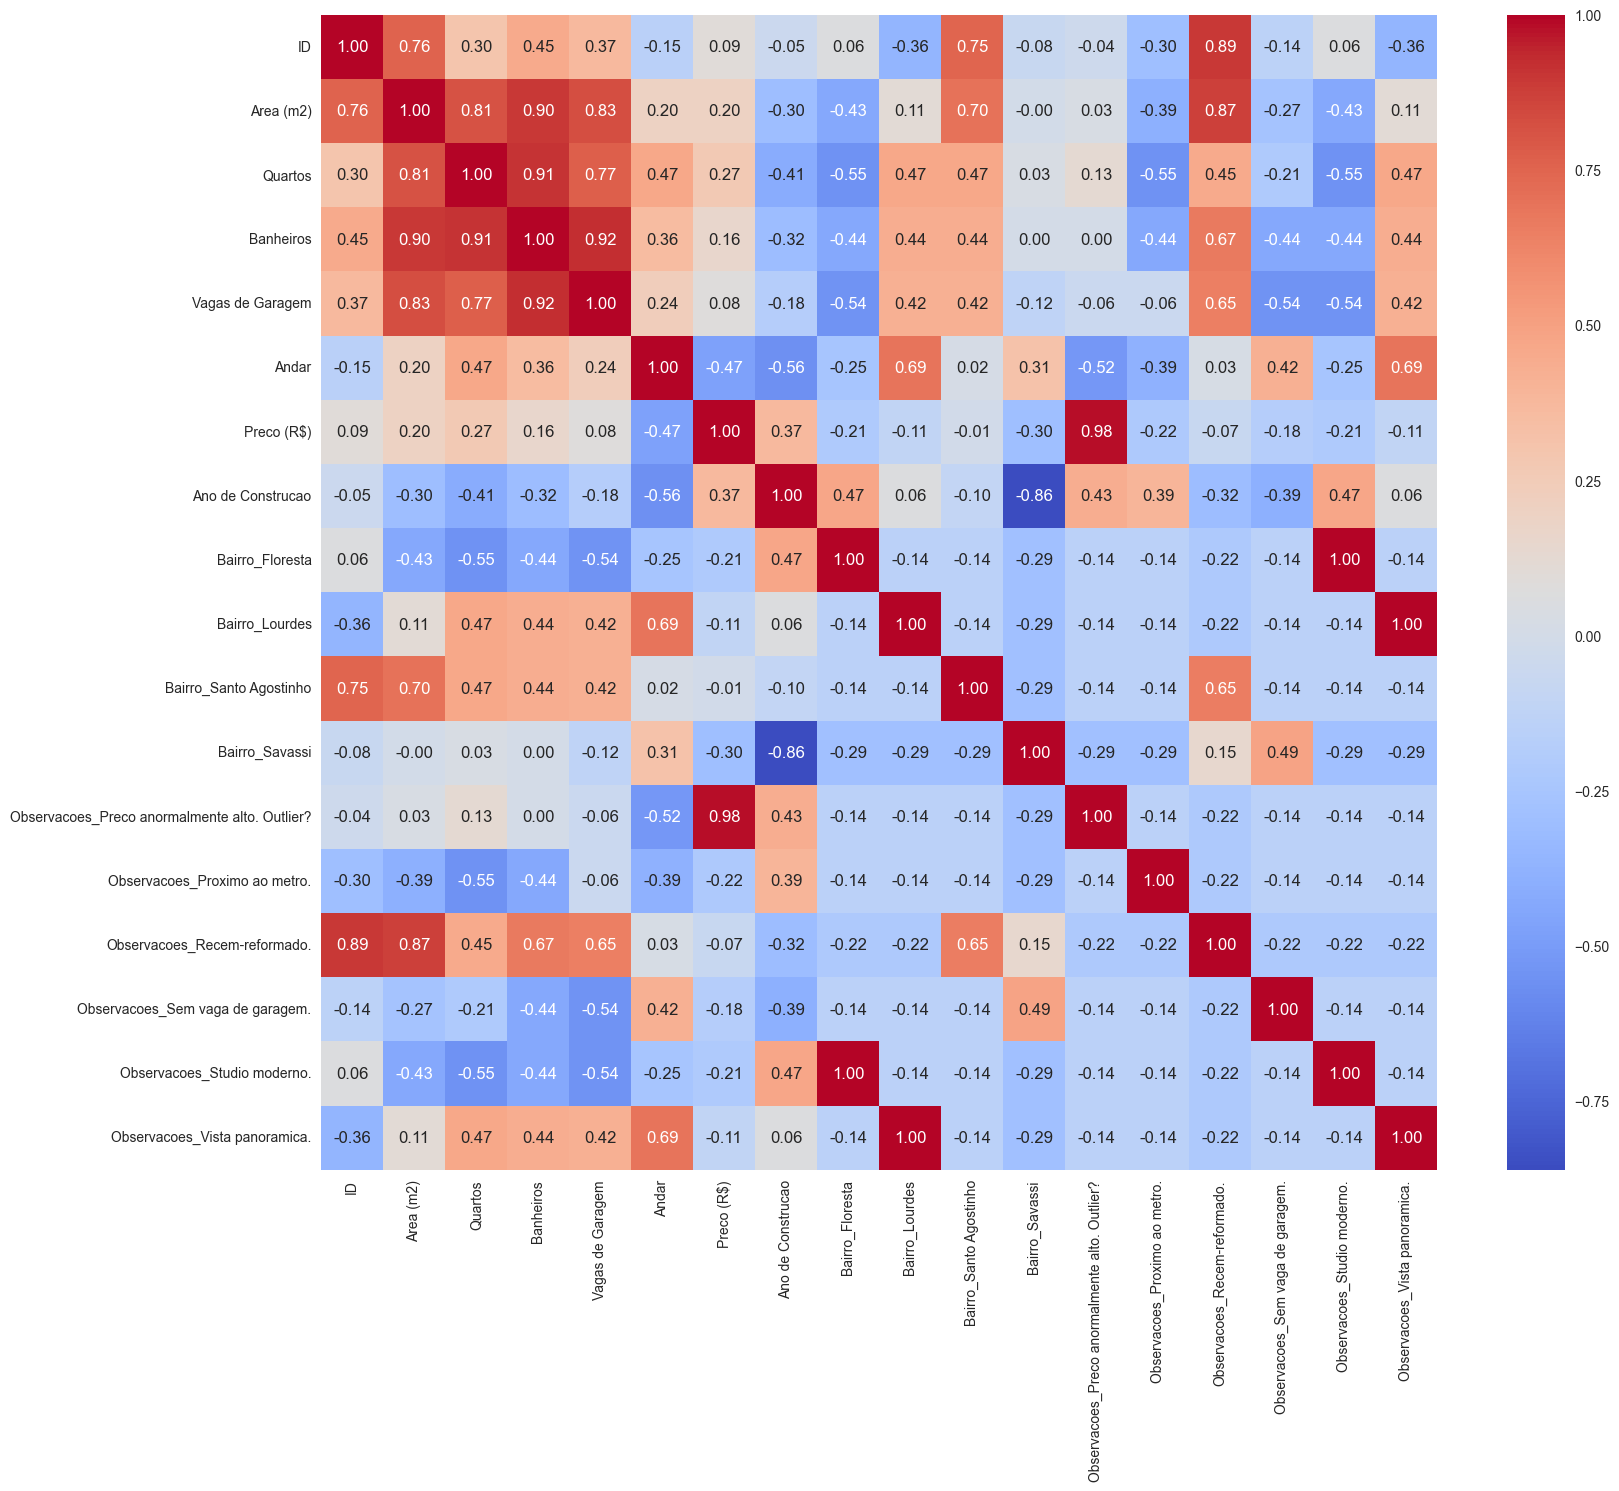

In [14]:
df = df.dropna()


# Converte a coluna 'bairro' em variáveis 'dummy'
df_dummies = pd.get_dummies(df, drop_first=True)

corr = df_dummies.corr()

plt.figure(figsize=(18, 15))

sns.heatmap(corr,cmap = 'coolwarm', annot=True,fmt = '.2f')